# Basic comparison of newspapers

In this Notebook, we will make some more visualizations of the corpus. Here, we will use the preprocessing that we performed in the previous Notebook, in order to create plots that are a bit less general than the ones we made in Notebook 2.

## Import packages

Import the necessary packages for this notebook.

In [2]:
import pandas as pd
import plotly.express as px


## Load the dataset

In [3]:
data = pd.read_csv('data/data_preprocessed.csv')
data = data.dropna(subset=['content'])
# Show the first rows of the DataFrame
data.head(2)

,identifier,oaiIdentifier,type,title,date,content,krantnaam,verspreidingsgebied,month,day,doc,places
0,http://resolver.kb.nl/resolve?urn=ddd:01106545...,DDD:ddd:011065450:mpeg21,artikel,Buitenland.,1873-01-01,Fkankhjjk. Volgens 't officieele blad heeft de...,De standaard,Landelijk,January,Wednesday,Fkankhjjk. Volgens 't officieele blad heeft de...,"['Fkankhjjk', 'Mailand', 'Franscho', 'Duitschl..."
1,http://resolver.kb.nl/resolve?urn=ddd:01106545...,DDD:ddd:011065450:mpeg21,artikel,"* Groningen, 30 Dec. In eene",1873-01-01,"* Groningen, 30 Dec. In eene ring van kerkvoog...",De standaard,Landelijk,January,Wednesday,"* Groningen, 30 Dec. In eene ring van kerkvoog...","['Groningen', 'derAmsterdam', 'Amsterdam', 'Le..."


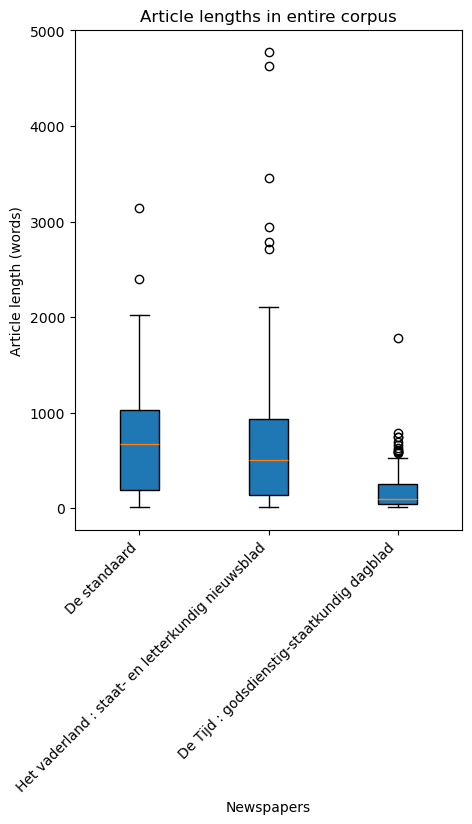

In [16]:
import matplotlib.pyplot as plt

# Extract the article lengths for each newspaper
newspaper_names = data['krantnaam'].unique()
article_lengths = [data[data['krantnaam'] == newspaper]['article_length'] for newspaper in newspaper_names]

# Create the box plot
fig, ax = plt.subplots(figsize=(5, 6.5))  # width=5 inches, height=6.5 inches

# Plot data
ax.boxplot(article_lengths, vert=True, patch_artist=True)

# Set the title and labels
ax.set_title('Article lengths in entire corpus')
ax.set_ylabel('Article length (words)')
ax.set_xticklabels(newspaper_names, rotation=45, ha='right')  # Set x-axis labels to newspaper names
ax.set_xlabel('Newspapers')

# Display the plot
plt.show()


## Looking at months and days

How about differences between different months and days of the week? Does the average article length depend on those factors? Let's take a look.

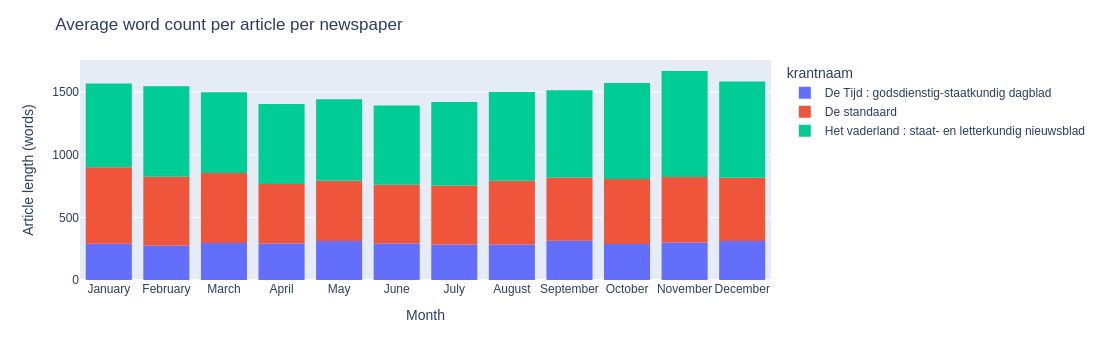

In [8]:
fig = px.histogram(data,
                 x='month',
                 y='article_length',
                 color='krantnaam',
                 histfunc='avg')

fig.update_layout(
    title='Average word count per article per newspaper',
    yaxis_title_text='Article length (words)',
    xaxis_title_text='Month'
)

fig.show()


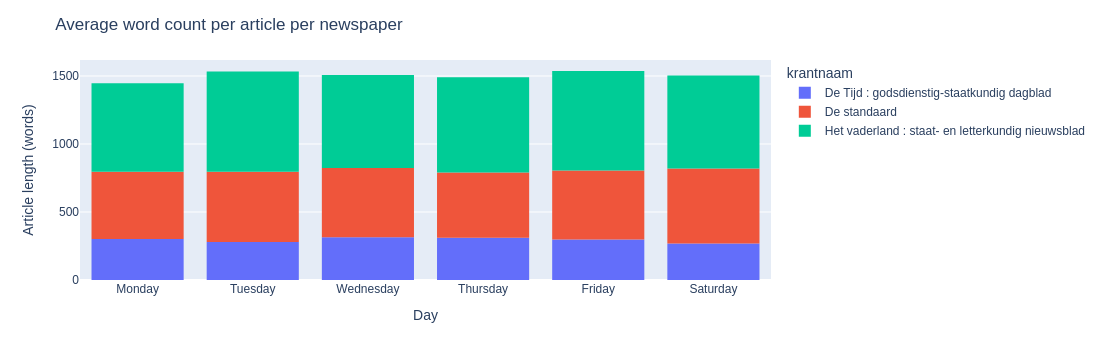

In [9]:
fig = px.histogram(data,
                 x='day',
                 y='article_length',
                 color='krantnaam',
                 histfunc='avg')

fig.update_layout(
    title='Average word count per article per newspaper',
    yaxis_title_text='Article length (words)',
    xaxis_title_text='Day'
)

fig.update_xaxes(
    categoryorder='array',
    categoryarray=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
)

fig.show()


## Do we want more visualizations here?